In [1]:
from Factor_Number import Number_Factorer, ShorFactorization, EkeraFactorization, ClassicalOrderFindingBad

In [2]:
bad_order_algo = ClassicalOrderFindingBad()
shor_algo = ShorFactorization()
ekera_algo = EkeraFactorization()

In [3]:
#orchestrator

nf1 = Number_Factorer(factor_algo=shor_algo,order_algo=bad_order_algo)
nf2 = Number_Factorer(factor_algo=ekera_algo,order_algo=bad_order_algo)

In [4]:
nf1.factor(5673439), nf2.factor(5673439)

([(977, 1), (5807, 1)], [(977, 1), (5807, 1)])

In [5]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt


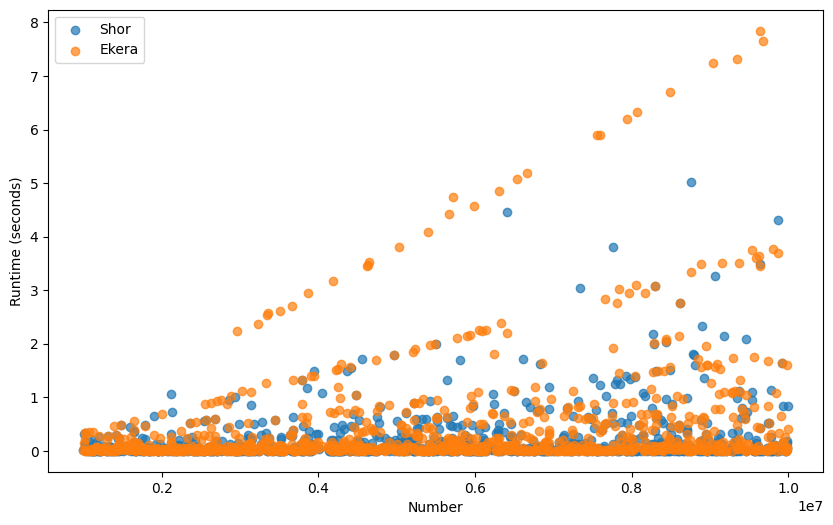

In [11]:
# Generate test numbers
test_numbers = [random.randint(10 ** 6, 10 ** 7) for _ in range(1000)]

# Defining benchmarking function
def benchmark(func, *args, **kwargs):
    start = time.perf_counter()
    _ = func(*args, **kwargs)
    end = time.perf_counter()
    return end - start

# Creating list of times for each algorithm

results = []

for n in test_numbers:
    shor_time = benchmark(nf1.factor, n)
    results.append(("Shor", n, shor_time))

    ekera_time = benchmark(nf2.factor, n)
    results.append(("Ekera", n, ekera_time))

# Turning results into a dataframe

df = pd.DataFrame(results, columns = ["Algorithm", "Number", "Runtime"])

# Plotting the result

plt.figure(figsize = (10, 6))

for algo in df["Algorithm"].unique():
    subset = df[df["Algorithm"] == algo]
    plt.scatter(subset["Number"], subset["Runtime"], label = algo, alpha = 0.7)

plt.xlabel("Number")
plt.ylabel("Runtime (seconds)")
plt.legend()
plt.show()



In [12]:
avg_times = df.groupby("Algorithm")["Runtime"].mean()
print(avg_times)

Algorithm
Ekera    0.433732
Shor     0.210368
Name: Runtime, dtype: float64


In [14]:
pivoted = df.pivot(index="Number", columns="Algorithm", values="Runtime")

# Difference: Shor - Ekera
pivoted["Difference"] = pivoted["Shor"] - pivoted["Ekera"]

print(pivoted.head())

Algorithm     Ekera      Shor  Difference
Number                                   
1001878    0.009319  0.009308   -0.000012
1015999    0.150590  0.318722    0.168132
1019009    0.324923  0.323985   -0.000938
1022793    0.212134  0.101438   -0.110697
1024138    0.000324  0.023931    0.023607


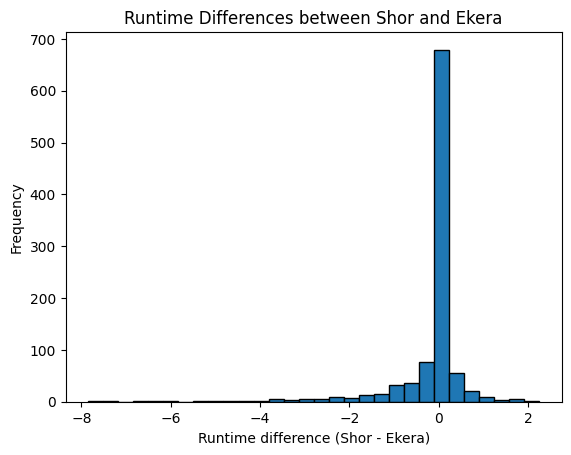

In [15]:
plt.hist(pivoted["Difference"], bins=30, edgecolor="black")
plt.xlabel("Runtime difference (Shor - Ekera)")
plt.ylabel("Frequency")
plt.title("Runtime Differences between Shor and Ekera")
plt.show()